In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df=pd.read_csv("/kaggle/input/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
df.groupby(["Embarked"]).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
Embarked,,,,,,,,,,,
C,168,168,168,168,168,130,168,168,168,168,69
Q,77,77,77,77,77,28,77,77,77,77,4
S,644,644,644,644,644,554,644,644,644,644,129


In [4]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df_new=df.drop(columns=['PassengerId','Name','Age','Ticket','Fare','Embarked','Cabin','Parch'])



<Axes: >

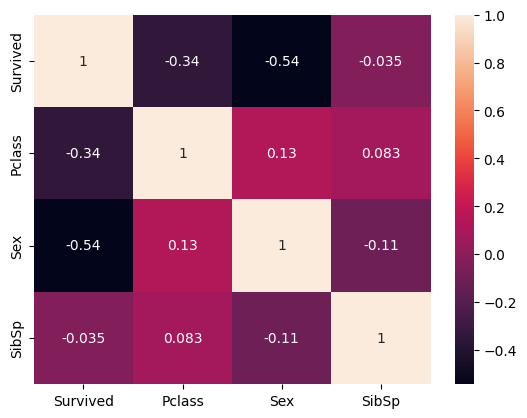

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_new['Sex']=le.fit_transform(df_new['Sex'])
sns.heatmap(df_new.corr(),annot=True)

In [8]:
x=df_new.drop(columns=['Survived'])
y=df['Survived']

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
model1=LogisticRegression()
model1.fit(x_train,y_train)
y_pred_1=model1.predict(x_test)
f1_score(y_test,y_pred_1)

0.7536231884057971

In [11]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(n_estimators=50,criterion='entropy')
model2.fit(x_train,y_train)
y_pred_2=model2.predict(x_test)
f1_score(y_test,y_pred_2)
y_pred_2

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0])

In [12]:
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier(max_depth=50,criterion='entropy')
model3.fit(x_train,y_train)
y_pred_3=model3.predict(x_test)
f1_score(y_test,y_pred_3)
y_pred_3

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0])

In [13]:
from catboost import CatBoostClassifier
model4=CatBoostClassifier()
model4.fit(x_train,y_train)
y_pred_4=model4.predict(x_test)
f1_score(y_test,y_pred_4)

Learning rate set to 0.008417
0:	learn: 0.6881843	total: 53.5ms	remaining: 53.5s
1:	learn: 0.6832561	total: 54ms	remaining: 27s
2:	learn: 0.6801739	total: 54.5ms	remaining: 18.1s
3:	learn: 0.6753637	total: 54.9ms	remaining: 13.7s
4:	learn: 0.6707599	total: 55.3ms	remaining: 11s
5:	learn: 0.6678578	total: 55.6ms	remaining: 9.22s
6:	learn: 0.6632601	total: 56.1ms	remaining: 7.96s
7:	learn: 0.6585716	total: 56.5ms	remaining: 7.01s
8:	learn: 0.6543029	total: 56.9ms	remaining: 6.27s
9:	learn: 0.6516324	total: 57.3ms	remaining: 5.67s
10:	learn: 0.6474041	total: 57.7ms	remaining: 5.18s
11:	learn: 0.6432674	total: 58.1ms	remaining: 4.79s
12:	learn: 0.6392159	total: 58.5ms	remaining: 4.44s
13:	learn: 0.6352543	total: 58.9ms	remaining: 4.15s
14:	learn: 0.6314693	total: 59.3ms	remaining: 3.89s
15:	learn: 0.6275620	total: 59.7ms	remaining: 3.67s
16:	learn: 0.6239402	total: 60.1ms	remaining: 3.47s
17:	learn: 0.6203966	total: 60.4ms	remaining: 3.3s
18:	learn: 0.6169042	total: 60.9ms	remaining: 3.14s

0.7171717171717171

In [14]:
from xgboost import XGBClassifier
model5=XGBClassifier(max_depth=5)
model5.fit(x_train,y_train)
y_pred_5=model5.predict(x_test)
f1_score(y_test,y_pred_5)

0.7346938775510204